# Boston Dataset

In [7]:
#importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
# For t-tests and ANOVA.
import scipy.stats as stats

In [8]:
%matplotlib inline

In [9]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [10]:
#importing the dataset
from sklearn.datasets import load_boston
boston = load_boston()

 # Describe

In [12]:
#take a look at the datset keys
#we can see the dataset has a number of keys which correspond to the data, target, features and a description
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [13]:
#Lets take a look at each of the keys in turn starting with a description of the dataset
#We can see the various data points which are contained in the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [15]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [16]:
#Create a dataframe from the data set and add the feature names as column labels. 
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [17]:
#Lets take a look at the shape of the dataset
#The data set contains 506 rows and 13 columns
boston.data.shape

(506, 13)

In [18]:
#Check the data set for any null values
#We can see there are no blank fields in the dataset which may effect the statistics
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [19]:
#take a look at the first 5 rows in the dataset
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [20]:
#take a look at the last 5 rows in the dataset
df.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88

In [21]:
# we can see there is no Proce column as this is contained in the target variable
#Lets add the column to the dataset
df['MEDV'] = boston.target
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [22]:
#Show the maximum price
df['MEDV'].max()

50.0

In [23]:
#show the minimum price
df['MEDV'].min()

5.0

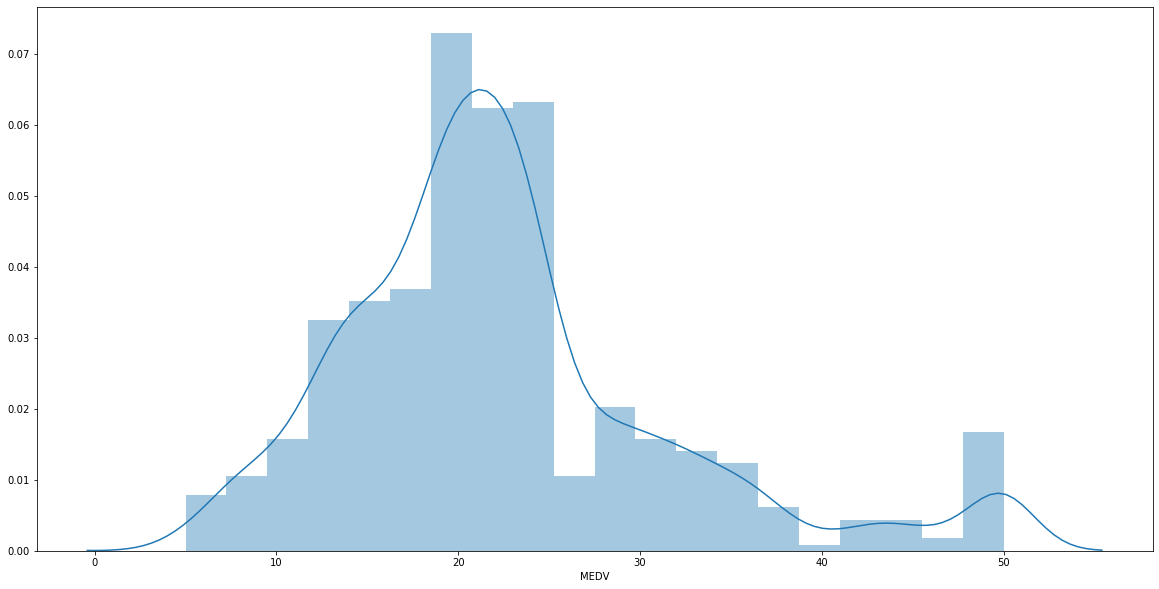

In [24]:
#Lets plot some of the statistic contained in the data set
#The median value of properties is normally distributed except for a few outliers represented by the bell shaped curve. 
sns.distplot(df['MEDV'], bins=20)
plt.show()

In [25]:
#lets create a subset of data to make plotting graphs more legible
#CRIM per capita cime rate by town
#RM average number of rooms per dwelling
#B proportion of blacks by town
#MEDV median value of owner ooccupied homes
cols = ['CRIM', 'RM', 'B', 'MEDV', 'LSTAT']

In [26]:
df[cols].head()

CRIM     RM       B  MEDV  LSTAT
0  0.00632  6.575  396.90  24.0   4.98
1  0.02731  6.421  396.90  21.6   9.14
2  0.02729  7.185  392.83  34.7   4.03
3  0.03237  6.998  394.63  33.4   2.94
4  0.06905  7.147  396.90  36.2   5.33

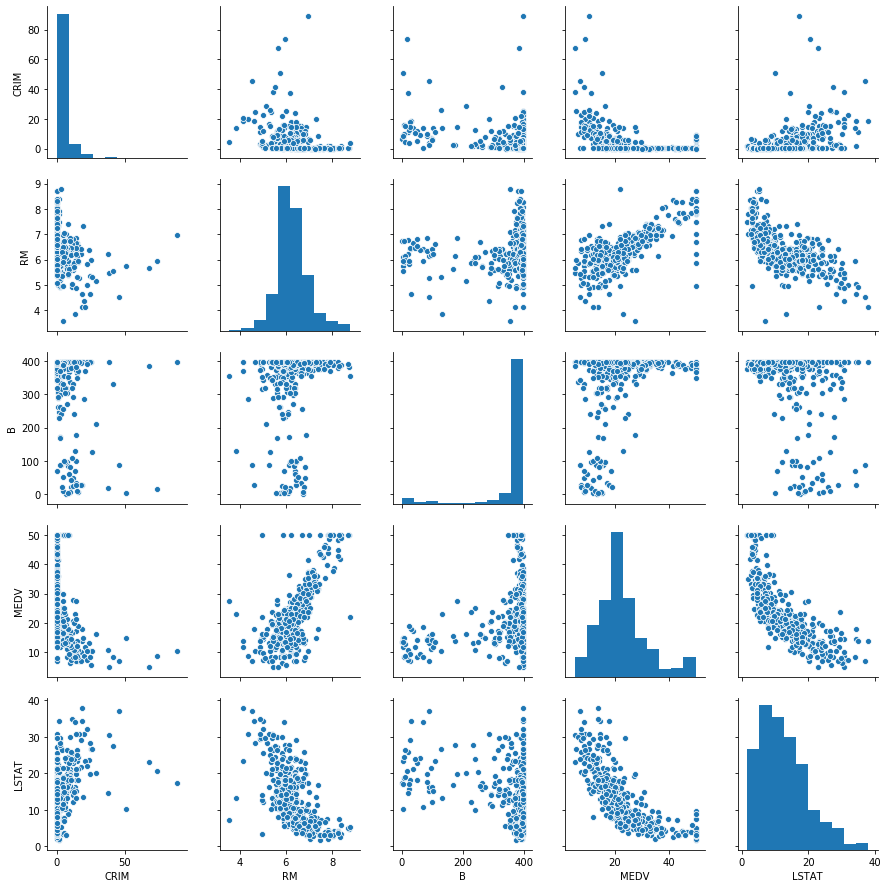

In [27]:
#plot the subset of data to identify any patterns
sns.pairplot(df[cols])

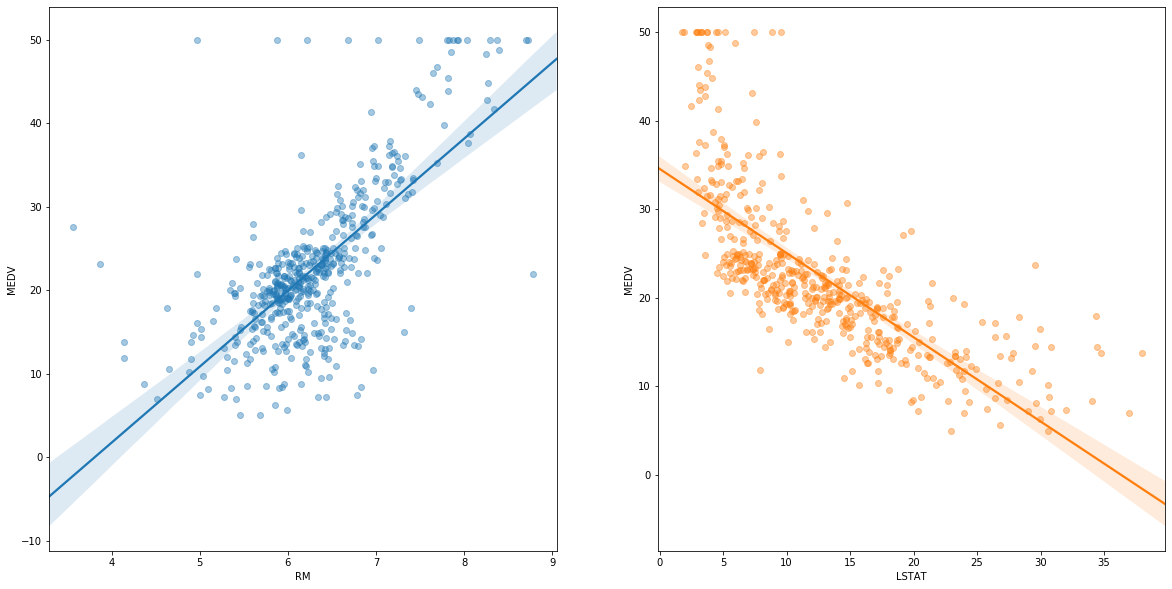

In [28]:
#Lets compare the house prices against some of the subset of features
fig, ax = plt.subplots(1, 2)
sns.regplot('RM', 'MEDV', df, ax=ax[0],
scatter_kws={'alpha': 0.4})
sns.regplot('LSTAT', 'MEDV', df, ax=ax[1],
scatter_kws={'alpha': 0.4}) 

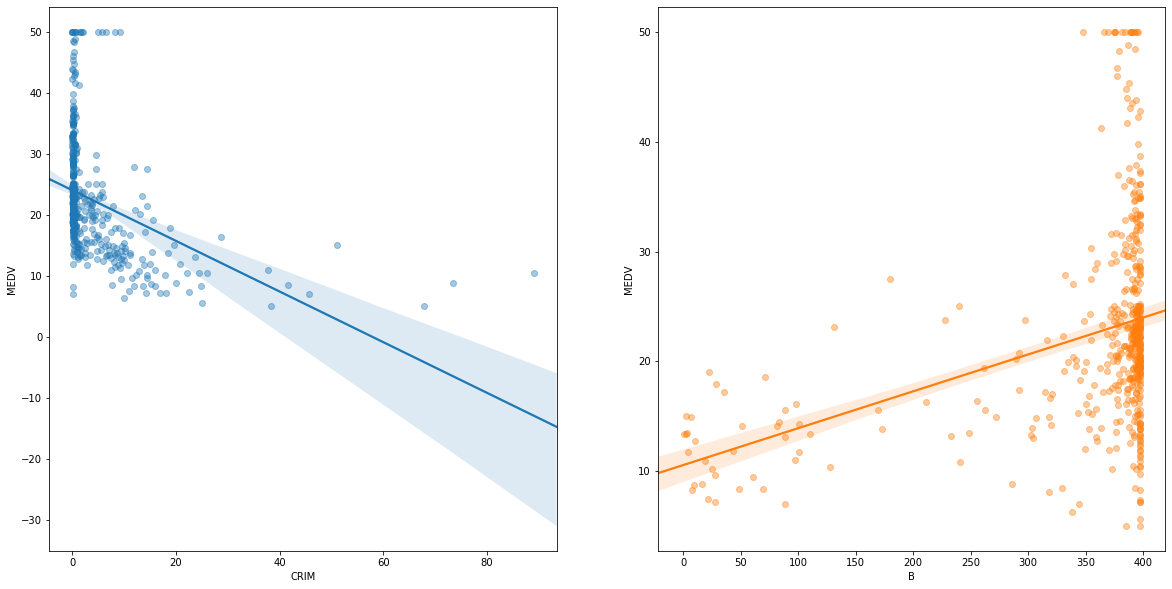

In [30]:
#Lets compare the house prices against some of the subset of features
fig, ax = plt.subplots(1, 2)
sns.regplot('CRIM', 'MEDV', df, ax=ax[0],
scatter_kws={'alpha': 0.4})
sns.regplot('B', 'MEDV', df, ax=ax[1],
scatter_kws={'alpha': 0.4})

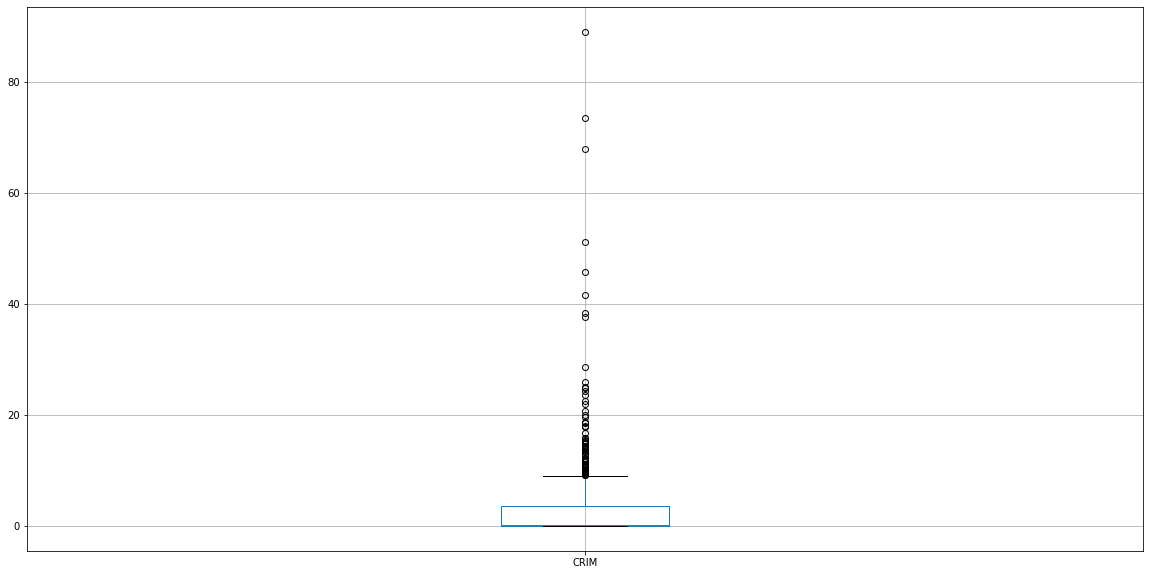

In [31]:
#Lets tak a look at a boxblot for the CRIM statistic
df.boxplot(column='CRIM', sym='o', return_type='axes')

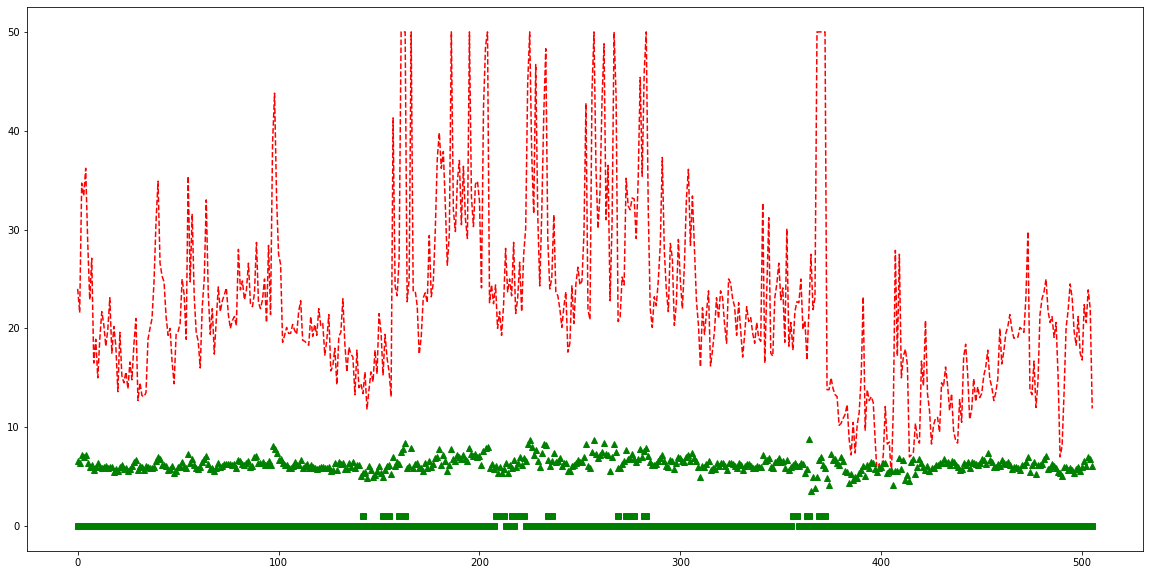

In [32]:
#Plot multiple data points  
CHAS = df.CHAS.values
MEDV = df.MEDV.values
RM = df.RM.values
plt.plot(MEDV, 'r--', CHAS, 'gs', RM, 'g^')

# INFER

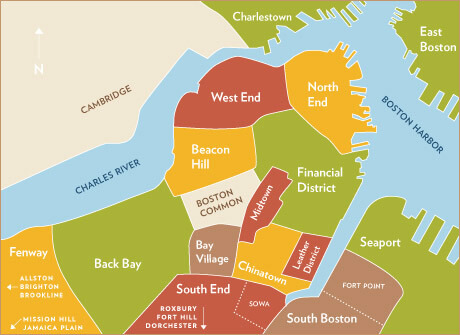

In [33]:
#Lets take a look at the correlations between various data points in the Boston Housing dataset
#we can see here that the correlation between proximity to the Charles River and the Median price is 0.175260 
#which indicates no real correlation between these data points
df.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

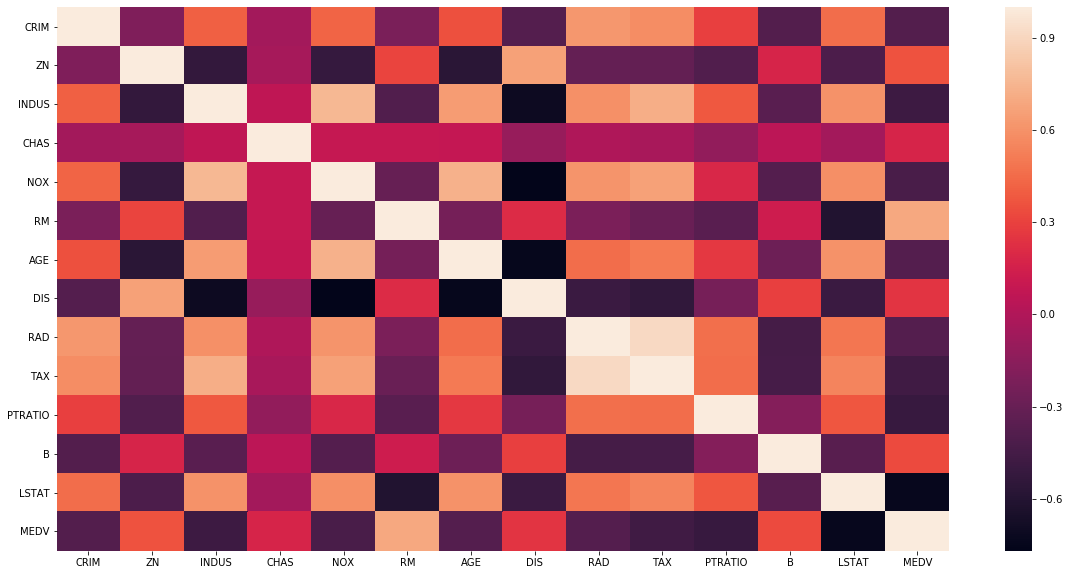

In [34]:
#We can visually display these correlations in a heatmap
#Again we can see the color code indicatinf no strong positive or negative correlation between the data points
hm = sns.heatmap(df.corr())

In [35]:
#lets take a look at he pair plots for these data points. 
cols = ['CHAS', 'MEDV']

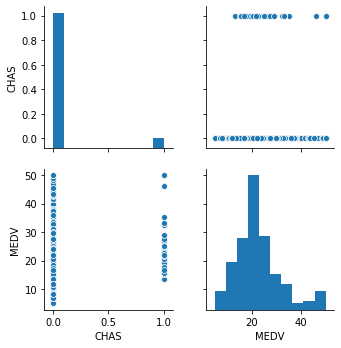

In [36]:
sns.pairplot(df[cols])

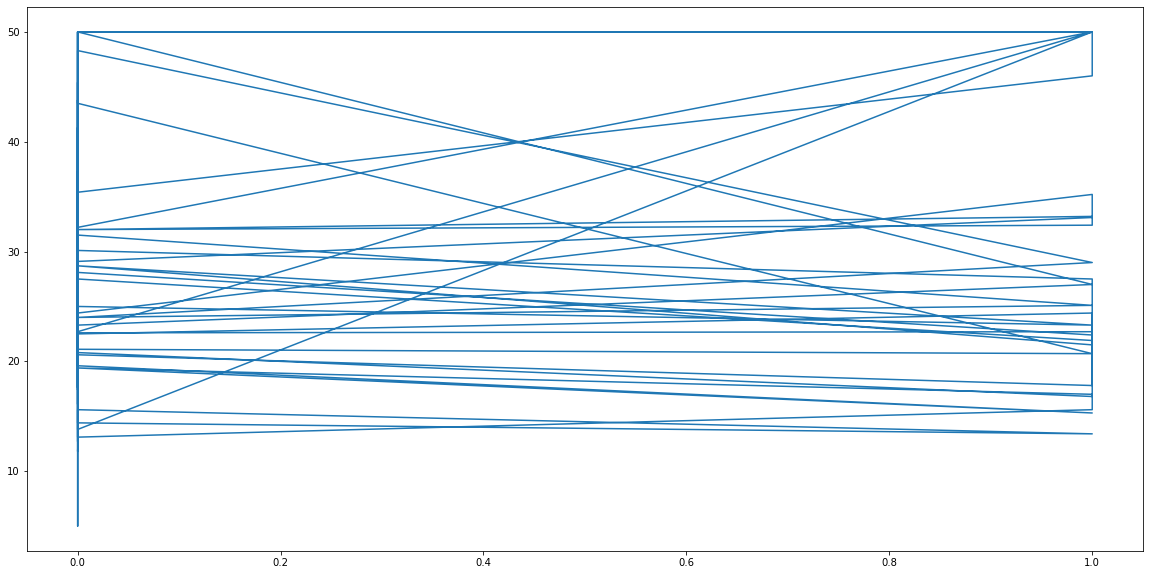

In [37]:
#plotting the values on a line graph looks a bit messy. We would expect to see a more linear output if there was a direct correlation
#Plotting house values for property which borders the Charles river and those which do not seperately might make the output clearer
#given the CHAS has a value of 0 or 1
CHAS = df.CHAS.values
MEDV = df.MEDV.values
plt.plot(CHAS, MEDV)


In [38]:
#Check if the data looks like our plot
#here we can see a majority of houses do not border the Charles Riveer ie (0) value
df.CHAS.values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0.

In [39]:
#lets select all property which borders the river
x1 = df.loc[df['CHAS'] == 1].MEDV.values

In [40]:
#lets view all the property which does not border the Charles River 
y1 = df.loc[df['CHAS'] == 0].MEDV.values

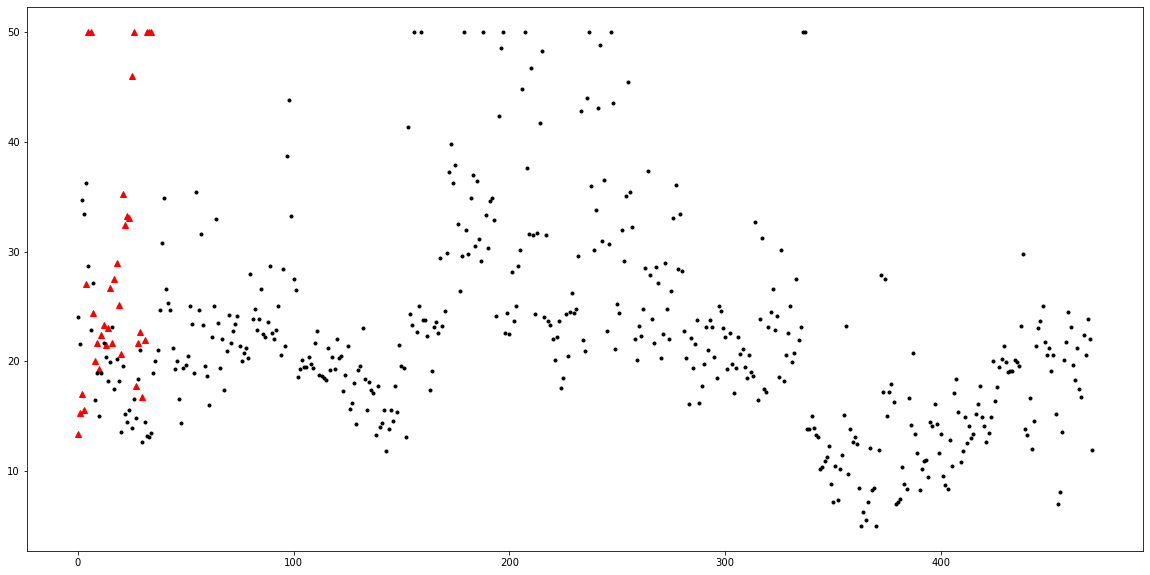

In [41]:
#Lets plot the data points on a graph
#We have a larger set of data points which do not border the Charles River indicated in black
plt.plot(x1, 'r^', y1, 'k.')

In [42]:
#print( "The max value of properties bordering the Charles river is:")
#x1.max()
#print("The min value of properties bordering the Charles River is:")
#x1.min()
print("The mean value of properties bordering the Charles River is:")
x1.mean()
#print("The standard deviation of properties bordering the Charles River is: ")
#x1.std()
#print("The variance of properties bordering the Charles River is:")
#x1.var()

The mean value of properties bordering the Charles River is:


28.439999999999998

# T TEST

In [43]:
import scipy.stats as ss

In [44]:
#The null hypothesis states that the average value of the populations of houses which border the Charles River are equal to 
# the average values of houses which do not border the Charles River
ss.ttest_ind(x1, y1)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

 Given the low p value of 7.390623170519905e-05 the probability that the average value of houses which border the Charles River being equal to the average
value of houses which do not border the Charles River is extremely small. 

In [46]:
#Using the statsmodels
#We can see the results are the same as above
import statsmodels.stats.weightstats as ws
ws.ttest_ind(x1, y1)

(3.9964374660905095, 7.390623170519883e-05, 504.0)

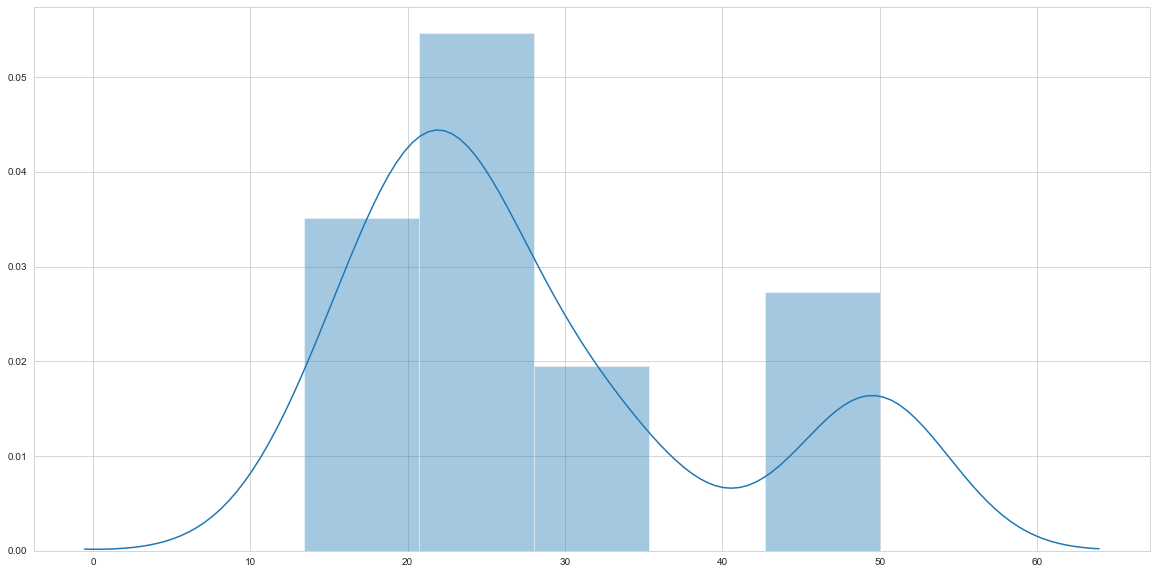

In [47]:
#Distribution plot of house values bordering the Charles River
sns.set_style("whitegrid")
sns.distplot(x1)

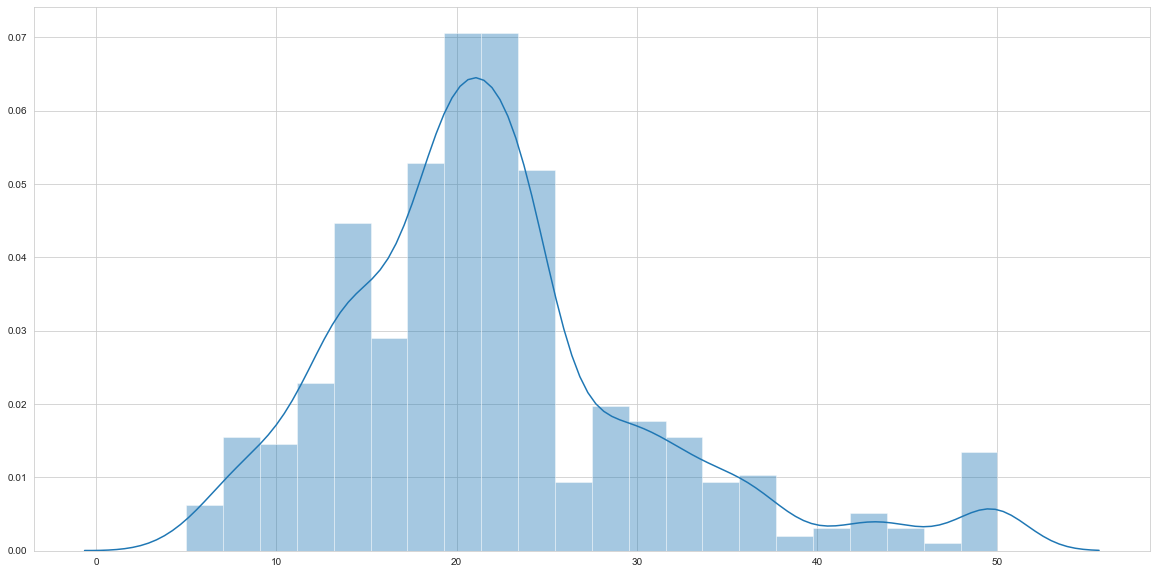

In [48]:
#Distribution plot of house values which do not border the Charles river
sns.distplot(y1)

C:\Users\maria\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


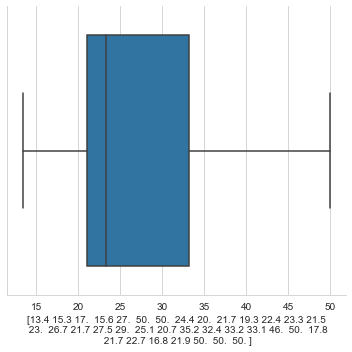

In [49]:
sns.catplot(x1, kind="box", data=df)

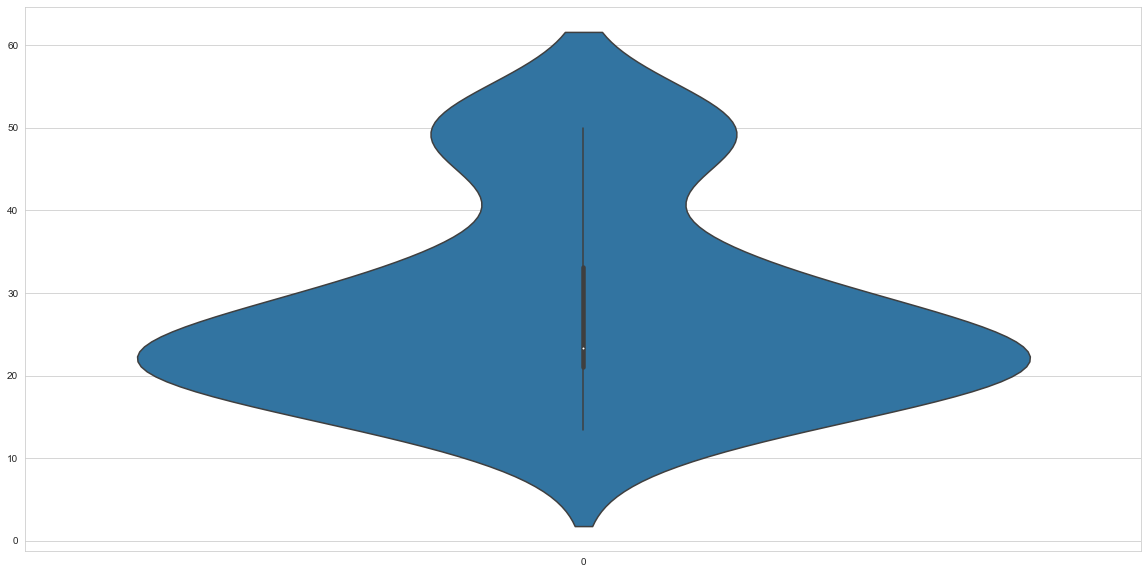

In [50]:
sns.violinplot(data=x1)

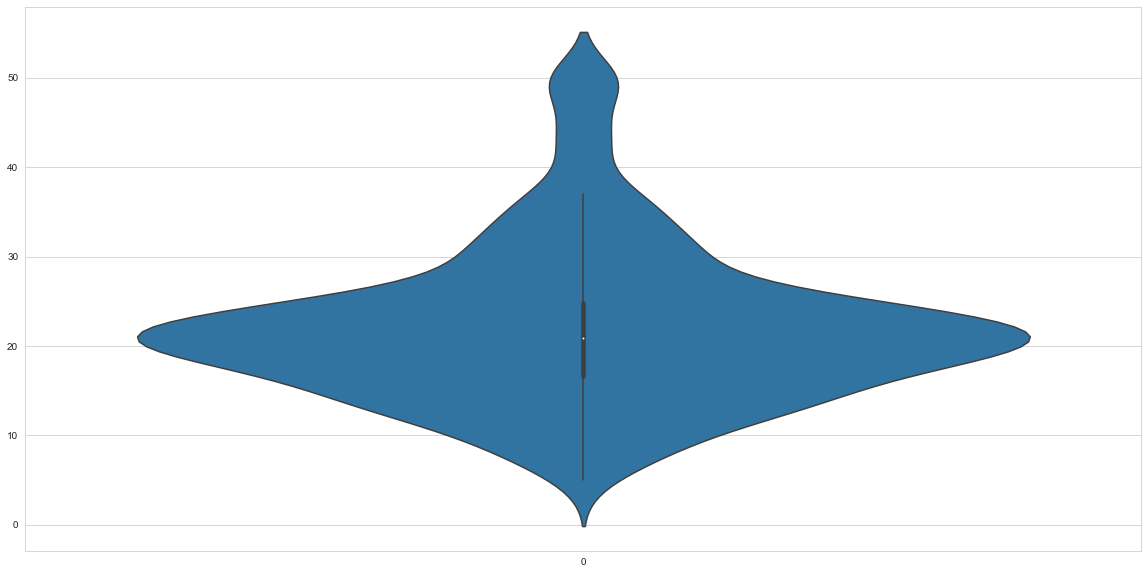

In [51]:
sns.violinplot(data=y1)

# T TESTING USING ANOVA

In [52]:
#T-Test using Anova
stats.f_oneway(x1, y1)

F_onewayResult(statistic=15.971512420371962, pvalue=7.390623170520815e-05)

(array([0.009908  , 0.02547771, 0.03632932, 0.06794055, 0.03680113,
        0.01840057, 0.01226704, 0.00377448, 0.00471809, 0.00660533]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

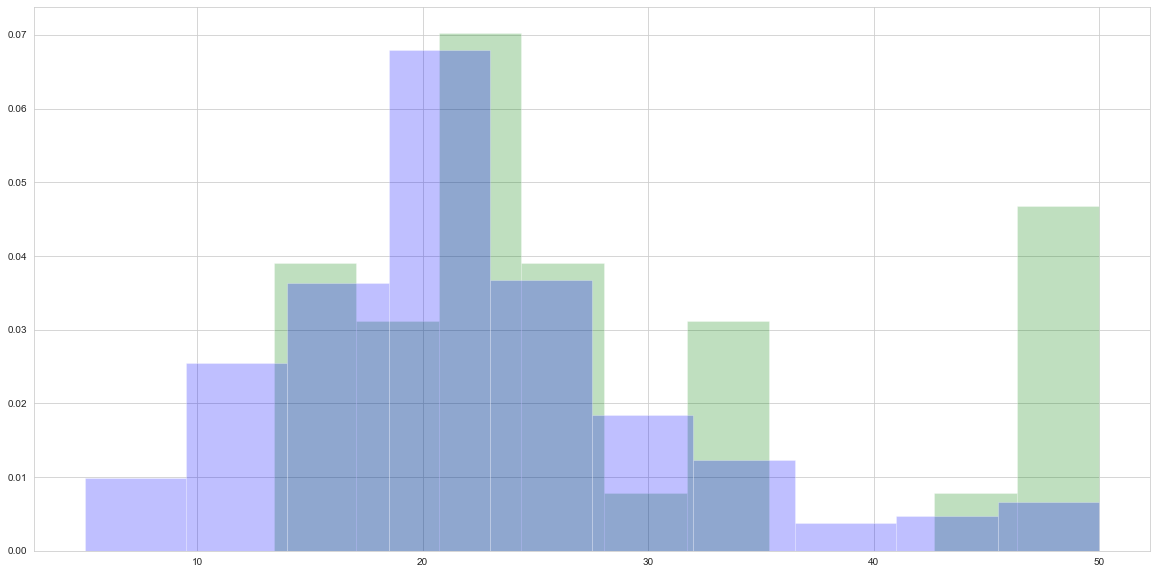

In [53]:
#Lets plot the results
x = np.linspace(1.25, 2.25, 1000)

pdfA = stats.norm.pdf(x1)
pdfB = stats.norm.pdf(y1)

#plt.fill_between(x, pdfA, color='g', alpha=0.25, label="Population A")
#plt.fill_between(x, pdfB, color='b', alpha=0.25, label="Population B")

plt.hist(x1, density=True, color='g', alpha=0.25, label="Sample A")
plt.hist(y1, density=True, color='b', alpha=0.25, label="Sample B")

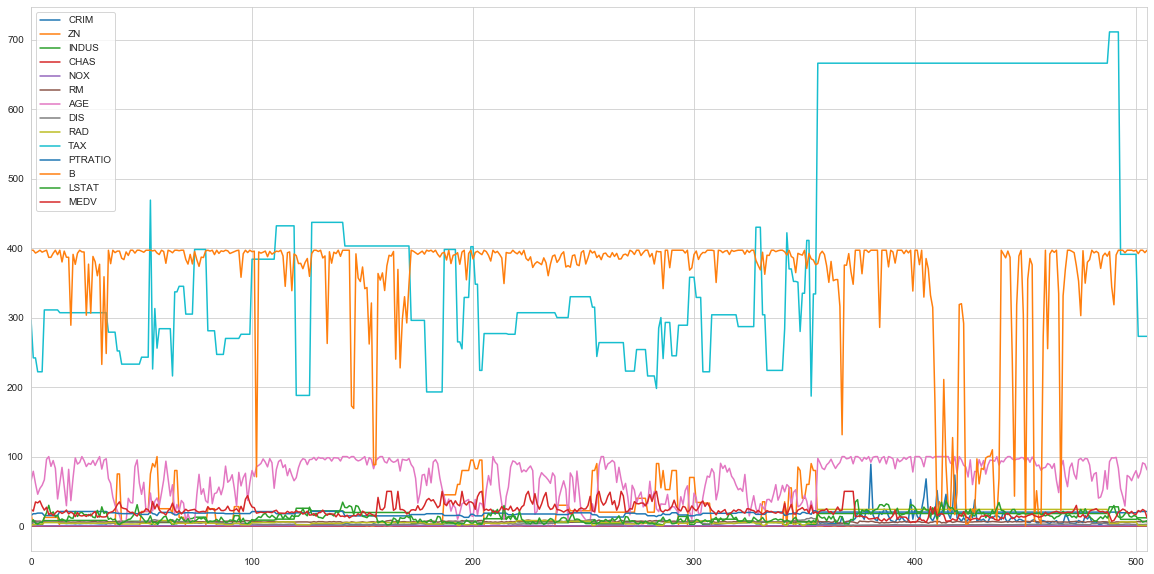

In [54]:
df.plot()

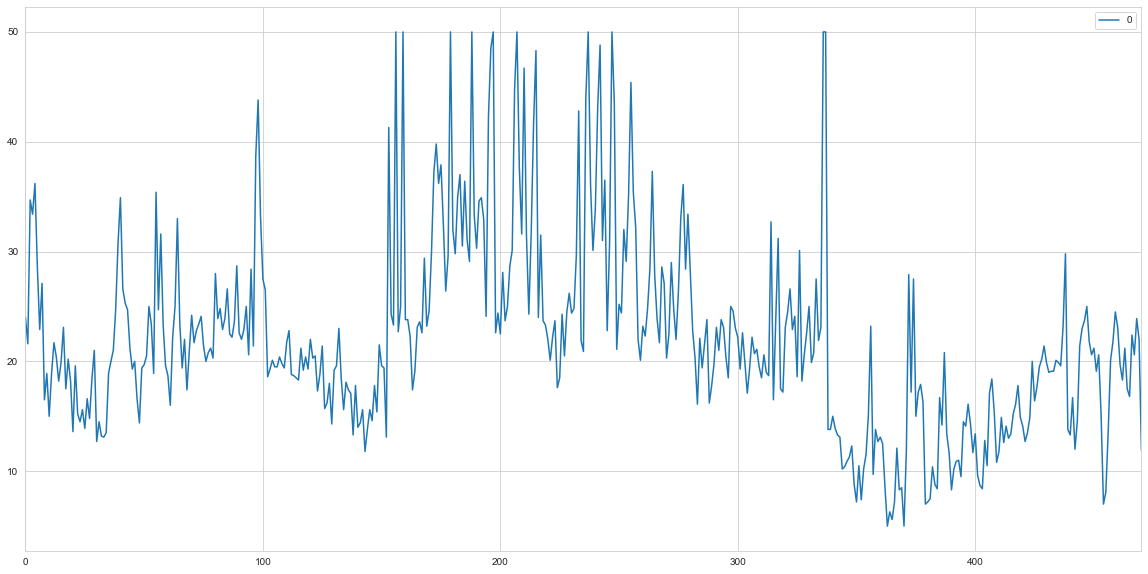

In [58]:
df = pd.DataFrame(y1)
df.plot()

In [60]:
plt.hist(output, density=True, color='g', alpha=0.25, label="Actual Values")
plt.hist(m.predict(inputs), density=True, color='b', alpha=0.25, label="Predicted Values")

plt.legend()

NameError: name 'output' is not defined

# Keras

In [61]:
# import libraries
import numpy as np
import pandas as pd
import keras as kr
# sklearn is used to perform the train test split of the data
from sklearn.model_selection import train_test_split
from sklearn import datasets

Using TensorFlow backend.


In [62]:
# import libraries
import numpy as np
import pandas as pd
import keras as kr
# sklearn is used to perform the train test split of the data
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [63]:
#Create a dataframe from the data set and add the feature names as column labels. 
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [64]:
df['MEDV'] = boston.target

In [65]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   5.0  311.0   
12    0.09378  12.5   7.87   0.0  0.524  5.889   39.0  5.4509   5.0  311.0   
13    0.62976   0.0   8.14   0.0  0.538  5.949   61.8  4.7075   4.0  307.0   
14    0.63796   0.0   8.14   0.0  0.538  6.096   84.5  4.4619   4.0  307.0   
15    0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
16    1.05393   0.0   8.14   0.0  0.538  5.935   29.3  4.4986   4.0  307.0   
17    0.78420   0.0   8.14   0.0  0.538  5.990   81.7  4.2579   4.0  307.0   
18    0.80271   0.0   8.14   0.0  0.538  5.456   36.6  3.7965   4.0  307.0   
19    0.72580   0.0   8.14   0.0  0.538  5.727   69.5  3.7965   4.0  307.0   
20    1.25179   0.0   8.14   0.0  0.538  5.570   98.1  3.7979   4.0  307.0   
21    0.85204   0.0   8.14   0.0  0.538  5.965   89.2  4.0123   4.0  307.0   
22    1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
23    0.98843   0.0   8.14   0.0  0.538  5.813  100.0  4.0952   4.0  307.0   
24    0.75026   0.0   8.14   0.0  0.538  5.924   94.1  4.3996   4.0  307.0   
25    0.84054   0.0   8.14   0.0  0.538  5.599   85.7  4.4546   4.0  307.0   
26    0.67191   0.0   8.14   0.0  0.538  5.813   90.3  4.6820   4.0  307.0   
27    0.95577   0.0   8.14   0.0  0.538  6.047   88.8  4.4534   4.0  307.0   
28    0.77299   0.0   8.14   0.0  0.538  6.495   94.4  4.4547   4.0  307.0   
29    1.00245   0.0   8.14   0.0  0.538  6.674   87.3  4.2390   4.0  307.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
476   4.87141   0.0  18.10   0.0  0.614  6.484   93.6  2.3053  24.0  666.0   
477  15.02340   0.0  18.10   0.0  0.614  5.304   97.3  2.1007  24.0  666.0   
478  10.23300   0.0  18.10   0.0  0.614  6.185   96.7  2.1705  24.0  666.0   
479  14.33370   0.0  18.10   0.0  0.614  6.229   88.0  1.9512  24.0  666.0   
480   5.82401   0.0  18.10   0.0  0.532  6.242   64.7  3.4242  24.0  666.0   
481   5.70818   0.0  18.10   0.0  0.532  6.750   74.9  3.3317  24.0  666.0   
482   5.73116   0.0  18.10   0.0  0.532  7.061   77.0  3.4106  24.0  666.0   
483   2.81838   0.0  18.10   0.0  0.532  5.762   40.3  4.0983  24.0  666.0   
484   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
485   3.67367   0.0  18.10   0.0  0.583  6.312   51.9  3.9917  24.0  666.0   
486   5.69175   0.0  18.10   0.0  0.583  6.114   79.8  3.5459  24.0  666.0   
487   4.83567   0.0  18.10   0.0  0.583  5.905   53.2  3.1523  24.0  666.0   
488   0.15086   0.0  27.74   0.0  0.609  5.454   92.7  1.8209   4.0  711.0   
489   0.18337   0.0  27.74   0.0  0.609  5.414   98.3  1.7554   4.0  711.0   
490   0.20746   0.0  27.74   0.0  0.609  5.093   98.0  1.8226   4.0  711.0   
491   0.10574   0.0  27.74   0.0  0.609  5.983   98.8  1.8681   4.0  711.0   
492   0.11132   0.0  27.74   0.0  0.609  5.983   83.5  2.1099   4.0  711.0   
493   0.17331   0.0   9.69   0.0  0.585  5.707   54.0  2.3817   6.0  391.0   
494   0.27957   0.0   9.69   0.0  0.585  5.926   42.6  2.3817   6.0  391.0   
495   0.17899   0.0   9.69   0.

In [66]:
#Set up our input variables. This includes all variables except the price
inputs = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
inputs

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   5.0  311.0   
12    0.09378  12.5   7.87   0.0  0.524  5.889   39.0  5.4509   5.0  311.0   
13    0.62976   0.0   8.14   0.0  0.538  5.949   61.8  4.7075   4.0  307.0   
14    0.63796   0.0   8.14   0.0  0.538  6.096   84.5  4.4619   4.0  307.0   
15    0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
16    1.05393   0.0   8.14   0.0  0.538  5.935   29.3  4.4986   4.0  307.0   
17    0.78420   0.0   8.14   0.0  0.538  5.990   81.7  4.2579   4.0  307.0   
18    0.80271   0.0   8.14   0.0  0.538  5.456   36.6  3.7965   4.0  307.0   
19    0.72580   0.0   8.14   0.0  0.538  5.727   69.5  3.7965   4.0  307.0   
20    1.25179   0.0   8.14   0.0  0.538  5.570   98.1  3.7979   4.0  307.0   
21    0.85204   0.0   8.14   0.0  0.538  5.965   89.2  4.0123   4.0  307.0   
22    1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
23    0.98843   0.0   8.14   0.0  0.538  5.813  100.0  4.0952   4.0  307.0   
24    0.75026   0.0   8.14   0.0  0.538  5.924   94.1  4.3996   4.0  307.0   
25    0.84054   0.0   8.14   0.0  0.538  5.599   85.7  4.4546   4.0  307.0   
26    0.67191   0.0   8.14   0.0  0.538  5.813   90.3  4.6820   4.0  307.0   
27    0.95577   0.0   8.14   0.0  0.538  6.047   88.8  4.4534   4.0  307.0   
28    0.77299   0.0   8.14   0.0  0.538  6.495   94.4  4.4547   4.0  307.0   
29    1.00245   0.0   8.14   0.0  0.538  6.674   87.3  4.2390   4.0  307.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
476   4.87141   0.0  18.10   0.0  0.614  6.484   93.6  2.3053  24.0  666.0   
477  15.02340   0.0  18.10   0.0  0.614  5.304   97.3  2.1007  24.0  666.0   
478  10.23300   0.0  18.10   0.0  0.614  6.185   96.7  2.1705  24.0  666.0   
479  14.33370   0.0  18.10   0.0  0.614  6.229   88.0  1.9512  24.0  666.0   
480   5.82401   0.0  18.10   0.0  0.532  6.242   64.7  3.4242  24.0  666.0   
481   5.70818   0.0  18.10   0.0  0.532  6.750   74.9  3.3317  24.0  666.0   
482   5.73116   0.0  18.10   0.0  0.532  7.061   77.0  3.4106  24.0  666.0   
483   2.81838   0.0  18.10   0.0  0.532  5.762   40.3  4.0983  24.0  666.0   
484   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
485   3.67367   0.0  18.10   0.0  0.583  6.312   51.9  3.9917  24.0  666.0   
486   5.69175   0.0  18.10   0.0  0.583  6.114   79.8  3.5459  24.0  666.0   
487   4.83567   0.0  18.10   0.0  0.583  5.905   53.2  3.1523  24.0  666.0   
488   0.15086   0.0  27.74   0.0  0.609  5.454   92.7  1.8209   4.0  711.0   
489   0.18337   0.0  27.74   0.0  0.609  5.414   98.3  1.7554   4.0  711.0   
490   0.20746   0.0  27.74   0.0  0.609  5.093   98.0  1.8226   4.0  711.0   
491   0.10574   0.0  27.74   0.0  0.609  5.983   98.8  1.8681   4.0  711.0   
492   0.11132   0.0  27.74   0.0  0.609  5.983   83.5  2.1099   4.0  711.0   
493   0.17331   0.0   9.69   0.0  0.585  5.707   54.0  2.3817   6.0  391.0   
494   0.27957   0.0   9.69   0.0  0.585  5.926   42.6  2.3817   6.0  391.0   
495   0.17899   0.0   9.69   0.

In [67]:
#Set up our output variable which is the median price
output = df['MEDV']
output

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [68]:
#Create our model with 13 inputs and a single output 
m = kr.models.Sequential()
m.add(kr.layers.Dense(10, input_dim= 13, activation="linear"))
m.add(kr.layers.Dense(10, activation="linear"))
m.add(kr.layers.Dense(1, activation="linear"))

Instructions for updating:
Colocations handled automatically by placer.


In [69]:
m.compile(loss="mean_squared_error", optimizer="adam")

In [70]:
m.fit(inputs, output, epochs=10, batch_size=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
506/506 [==============================] - 0s 572us/step - loss: 10962.7594
Epoch 2/10
506/506 [==============================] - 0s 99us/step - loss: 970.2408
Epoch 3/10
506/506 [==============================] - 0s 94us/step - loss: 476.6055
Epoch 4/10
506/506 [==============================] - 0s 86us/step - loss: 340.2844
Epoch 5/10
506/506 [==============================] - 0s 150us/step - loss: 286.1188
Epoch 6/10
506/506 [==============================] - 0s 186us/step - loss: 240.0783
Epoch 7/10
506/506 [==============================] - 0s 178us/step - loss: 208.1419
Epoch 8/10
506/506 [==============================] - 0s 96us/step - loss: 179.2853
Epoch 9/10
506/506 [==============================] - 0s 112us/step - loss: 159.4956
Epoch 10/10
506/506 [==============================] - 0s 167us/step - loss: 144.6664


In [71]:
m.predict(inputs) 

array([[ 20.457756 ],
       [ 16.401573 ],
       [ 18.976337 ],
       [ 22.123661 ],
       [ 20.968739 ],
       [ 19.464247 ],
       [ 22.411055 ],
       [ 17.33327  ],
       [ 20.453789 ],
       [ 18.836214 ],
       [ 18.258352 ],
       [ 18.42     ],
       [ 31.213263 ],
       [ 23.108152 ],
       [ 16.905943 ],
       [ 24.563599 ],
       [ 30.753475 ],
       [ 19.859596 ],
       [ 26.311031 ],
       [ 21.85548  ],
       [ 17.420382 ],
       [ 17.634657 ],
       [ 19.226921 ],
       [ 17.365723 ],
       [ 17.522827 ],
       [ 15.632755 ],
       [ 17.145308 ],
       [ 15.280283 ],
       [ 15.672979 ],
       [ 16.852875 ],
       [ 18.55936  ],
       [ 13.48106  ],
       [ 18.121302 ],
       [ 16.308111 ],
       [ 11.42914  ],
       [ 19.962267 ],
       [ 21.681961 ],
       [ 27.007332 ],
       [ 30.546877 ],
       [ 36.146835 ],
       [ 36.826218 ],
       [ 34.550903 ],
       [ 33.783268 ],
       [ 35.04748  ],
       [ 26.469824 ],
       [ 2

In [72]:
output.as_matrix 

<bound method NDFrame.as_matrix of 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64>

In [73]:
m.predict(inputs).T - output.as_matrix()

C:\Users\maria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ -3.54224396,  -5.19842682, -15.72366257, -11.27633896,
        -15.23126144,  -9.23575325,  -0.48894539,  -9.76673088,
          3.95378876,  -0.06378593,   3.25835228,  -0.47999992,
          9.51326256,   2.70815239,  -1.29405708,   4.66359863,
          7.65347519,   2.35959625,   6.11103134,   3.65548019,
          3.82038155,  -1.96534309,   4.02692108,   2.86572266,
          1.92282715,   1.73275528,   0.54530754,   0.48028297,
         -2.72702065,  -4.14712524,   5.8593605 ,  -1.01893997,
          4.92130165,   3.20811119,  -2.07085991,   1.06226692,
          1.68196106,   6.00733185,   5.84687691,   5.34683533,
          1.92621765,   7.95090332,   8.48326797,  10.34748154,
          5.26982384,   9.38169594,  10.56166649,   1.48437538,
          6.39549408,   4.23606262,   8.55465584,   1.15891647,
          6.59806633,   9.43945847,  22.43204651,   1.07695923,
         11.20210724,  -0.24735413,   7.91612167,   7.83392754,
          5.13394051,   0.05261803,  -1.

In [74]:
m.predict(inputs).T - output.as_matrix()

C:\Users\maria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ -3.54224396,  -5.19842682, -15.72366257, -11.27633896,
        -15.23126144,  -9.23575325,  -0.48894539,  -9.76673088,
          3.95378876,  -0.06378593,   3.25835228,  -0.47999992,
          9.51326256,   2.70815239,  -1.29405708,   4.66359863,
          7.65347519,   2.35959625,   6.11103134,   3.65548019,
          3.82038155,  -1.96534309,   4.02692108,   2.86572266,
          1.92282715,   1.73275528,   0.54530754,   0.48028297,
         -2.72702065,  -4.14712524,   5.8593605 ,  -1.01893997,
          4.92130165,   3.20811119,  -2.07085991,   1.06226692,
          1.68196106,   6.00733185,   5.84687691,   5.34683533,
          1.92621765,   7.95090332,   8.48326797,  10.34748154,
          5.26982384,   9.38169594,  10.56166649,   1.48437538,
          6.39549408,   4.23606262,   8.55465584,   1.15891647,
          6.59806633,   9.43945847,  22.43204651,   1.07695923,
         11.20210724,  -0.24735413,   7.91612167,   7.83392754,
          5.13394051,   0.05261803,  -1.

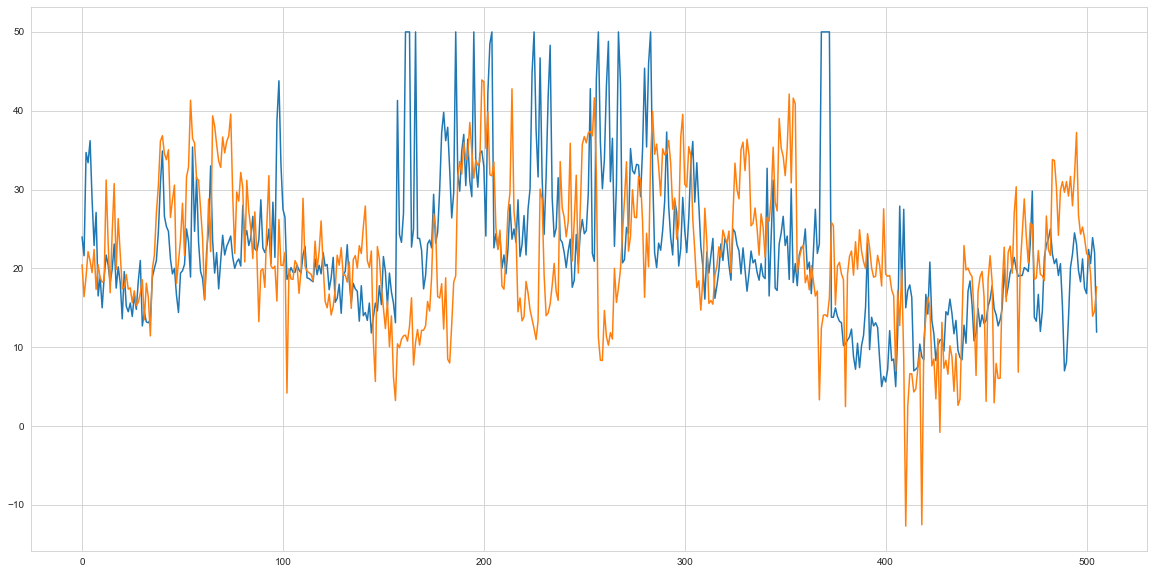

In [75]:
plt.plot(output)
plt.plot(m.predict(inputs))

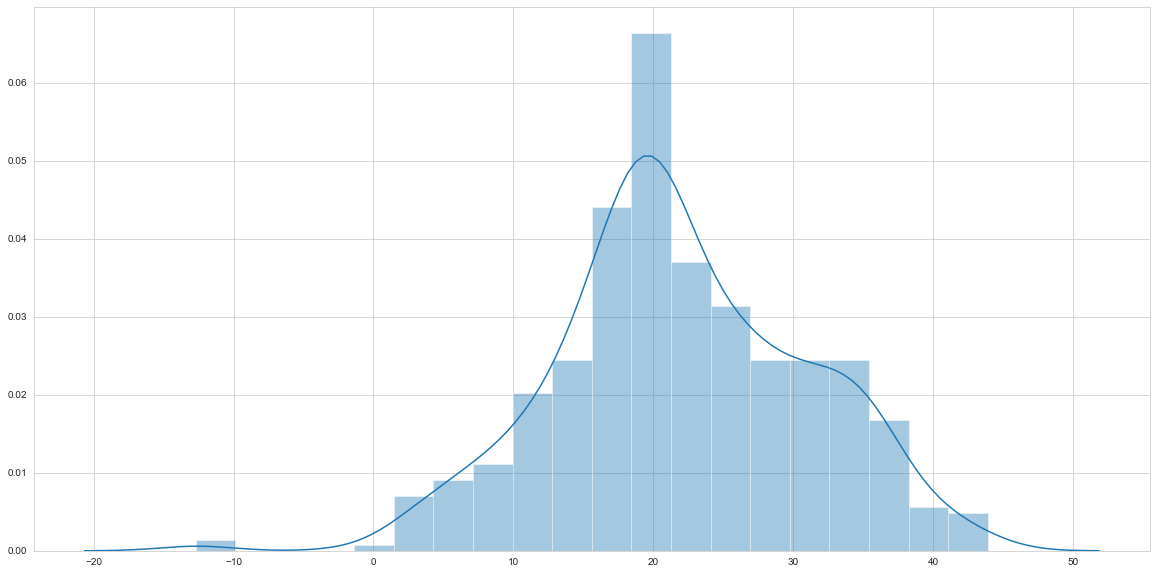

In [76]:
sns.distplot(m.predict(inputs))

In [77]:
#Importing Dataser
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [78]:
print(f'Training data : {train_data.shape}')
print(f'Test data : {test_data.shape}')
print(f'Training sample : {train_data[0]}')
print(f'Training target sample : {train_targets[0]}')

Training data : (404, 13)
Test data : (102, 13)
Training sample : [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Training target sample : 15.2


In [79]:
#Feature Normalization
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [80]:
#Building our model abd adding layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
    return model

In [82]:
#k-fold Validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f'Processing fold # {i}')
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
                            [train_data[:i * num_val_samples],
                            train_data[(i+1) * num_val_samples:]],
                            axis=0)
    partial_train_targets = np.concatenate(
                            [train_targets[:i * num_val_samples],
                            train_targets[(i+1)*num_val_samples:]],
                            axis=0)
    model = build_model()
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              batch_size=1,
              verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold # 0


NameError: name 'models' is not defined

In [85]:
#view scores
print(f'all_scores : {all_scores}')
print(f'mean all scores : {np.mean(all_scores)}')

all_scores : []
mean all scores : nan


In [86]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

NameError: name 'models' is not defined

In [87]:
test_mae_score

NameError: name 'test_mae_score' is not defined

In [88]:
 find the largest house price in the training set and use it to
# scale our house prices to the range [0, 1] 
maxPrice = train["price"].max()
trainY = train["price"] / maxPrice
testY = test["price"] / maxPrice

SyntaxError: invalid syntax (<ipython-input-88-0b84db519542>, line 1)

In [89]:
# process the house attributes data by performing min-max scaling
print("[INFO] processing data...")
(trainX, testX) = datasets.process_house_attributes(df, train, test)

[INFO] processing data...


AttributeError: module 'sklearn.datasets' has no attribute 'process_house_attributes'

In [2]:
# These are visualisation libraries
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
# Load boston dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
#Check keys
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
#Check the shape of the dataset
print(boston.data.shape)

(506, 13)


In [7]:
#The dataset contains 506 rows and 13 columns

In [8]:
#Print the features names ie. columns
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [9]:
#Take a look at the descriptions for each column
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
#Convert to a pandas dataframe
bos = pd.DataFrame(boston.data)


In [11]:
#Add the column feature names 
bos.columns = boston.feature_names


In [12]:
#view the first 5 statistics for each column
bos.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [13]:
#House prices are contained in a different attribute called target
boston.target.shape

(506,)

In [14]:
#look at the first 5 rows in each column
bos.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [15]:
#Look at the last 5 rows in each column
bos.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88

In [16]:
#view the types of information in each column
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [17]:
#Add the Price colunm to the bos dataset
bos['PRICE'] = boston.target
bos.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [18]:



#Print a description of the dataset
bos.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [19]:
#take a look at correlations between statistics. 
bos.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [20]:
#Take a look at some individual statistics
#Crime Rate
Crime_Rate = bos.CRIM
print("The maximum crime rate in boston is:")
print(Crime_Rate.max())
print("The minimun crime rate in boston is:")
print(Crime_Rate.min())


The maximum crime rate in boston is:
88.9762
The minimun crime rate in boston is:
0.00632


In [21]:
#Average number of rooms per dwelling
Number_of_Rooms = bos.RM
print("The maximum number of rooms per dwelling in boston is:")
print(Number_of_Rooms.max())
print("The minimum number of rooms per dwelling in boston is:")
print(Number_of_Rooms.min())

The maximum number of rooms per dwelling in boston is:
8.78
The minimum number of rooms per dwelling in boston is:
3.561


In [22]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [23]:
#Checking for null values
bos.isnull()

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False  False  False  False  False  False   
8    False  False  False  False  False  False  False  False  False  False   
9    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
11   False  False  False  False  False  False  False  False  False  False   
12   False  False  False  False  False  False  False  False  False  False   
13   False  False  False  False  False  False  False  False  False  False   
14   False  False  False  False  False  False  False  False  False  False   
15   False  False  False  False  False  False  False  False  False  False   
16   False  False  False  False  False  False  False  False  False  False   
17   False  False  False  False  False  False  False  False  False  False   
18   False  False  False  False  False  False  False  False  False  False   
19   False  False  False  False  False  False  False  False  False  False   
20   False  False  False  False  False  False  False  False  False  False   
21   False  False  False  False  False  False  False  False  False  False   
22   False  False  False  False  False  False  False  False  False  False   
23   False  False  False  False  False  False  False  False  False  False   
24   False  False  False  False  False  False  False  False  False  False   
25   False  False  False  False  False  False  False  False  False  False   
26   False  False  False  False  False  False  False  False  False  False   
27   False  False  False  False  False  False  False  False  False  False   
28   False  False  False  False  False  False  False  False  False  False   
29   False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
476  False  False  False  False  False  False  False  False  False  False   
477  False  False  False  False  False  False  False  False  False  False   
478  False  False  False  False  False  False  False  False  False  False   
479  False  False  False  False  False  False  False  False  False  False   
480  False  False  False  False  False  False  False  False  False  False   
481  False  False  False  False  False  False  False  False  False  False   
482  False  False  False  False  False  False  False  False  False  False   
483  False  False  False  False  False  False  False  False  False  False   
484  False  False  False  False  False  False  False  False  False  False   
485  False  False  False  False  False  False  False  False  False  False   
486  False  False  False  False  False  False  False  False  False  False   
487  False  False  False  False  False  False  False  False  False  False   
488  False  False  False  False  False  False  False  False  False  False   
489  False  False  False  False  False  False  False  False  False  False   
490  False  False  False  False  False  False  False  False  False  False   
491  False  False  False  False  False  False  False  False  False  False   
492  False  False  False  False  False  False  False  False  False  False   
493  False  False  False  False  False  False  False  False  False  False   
494  False  False  False  False  False  False  False  False  False  False   
495  False  False  False  False  False  False  False  False  False  False   
49

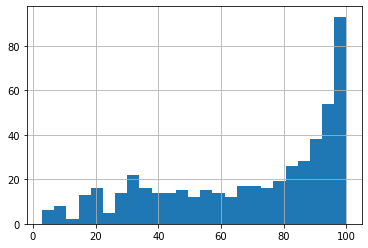

In [24]:
bos['AGE'].hist(bins=25)

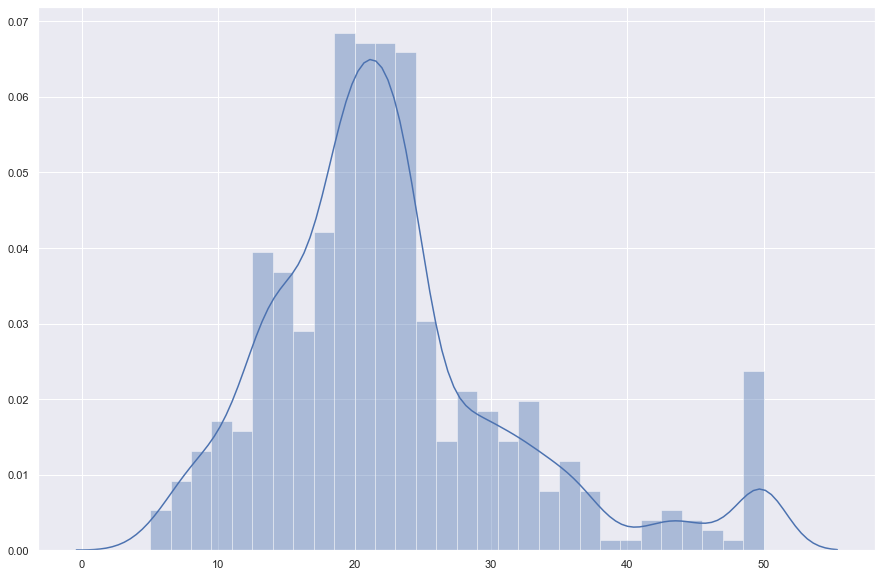

In [26]:
#Plot the distribution of house prices
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(boston['target'], bins=30)
plt.show()

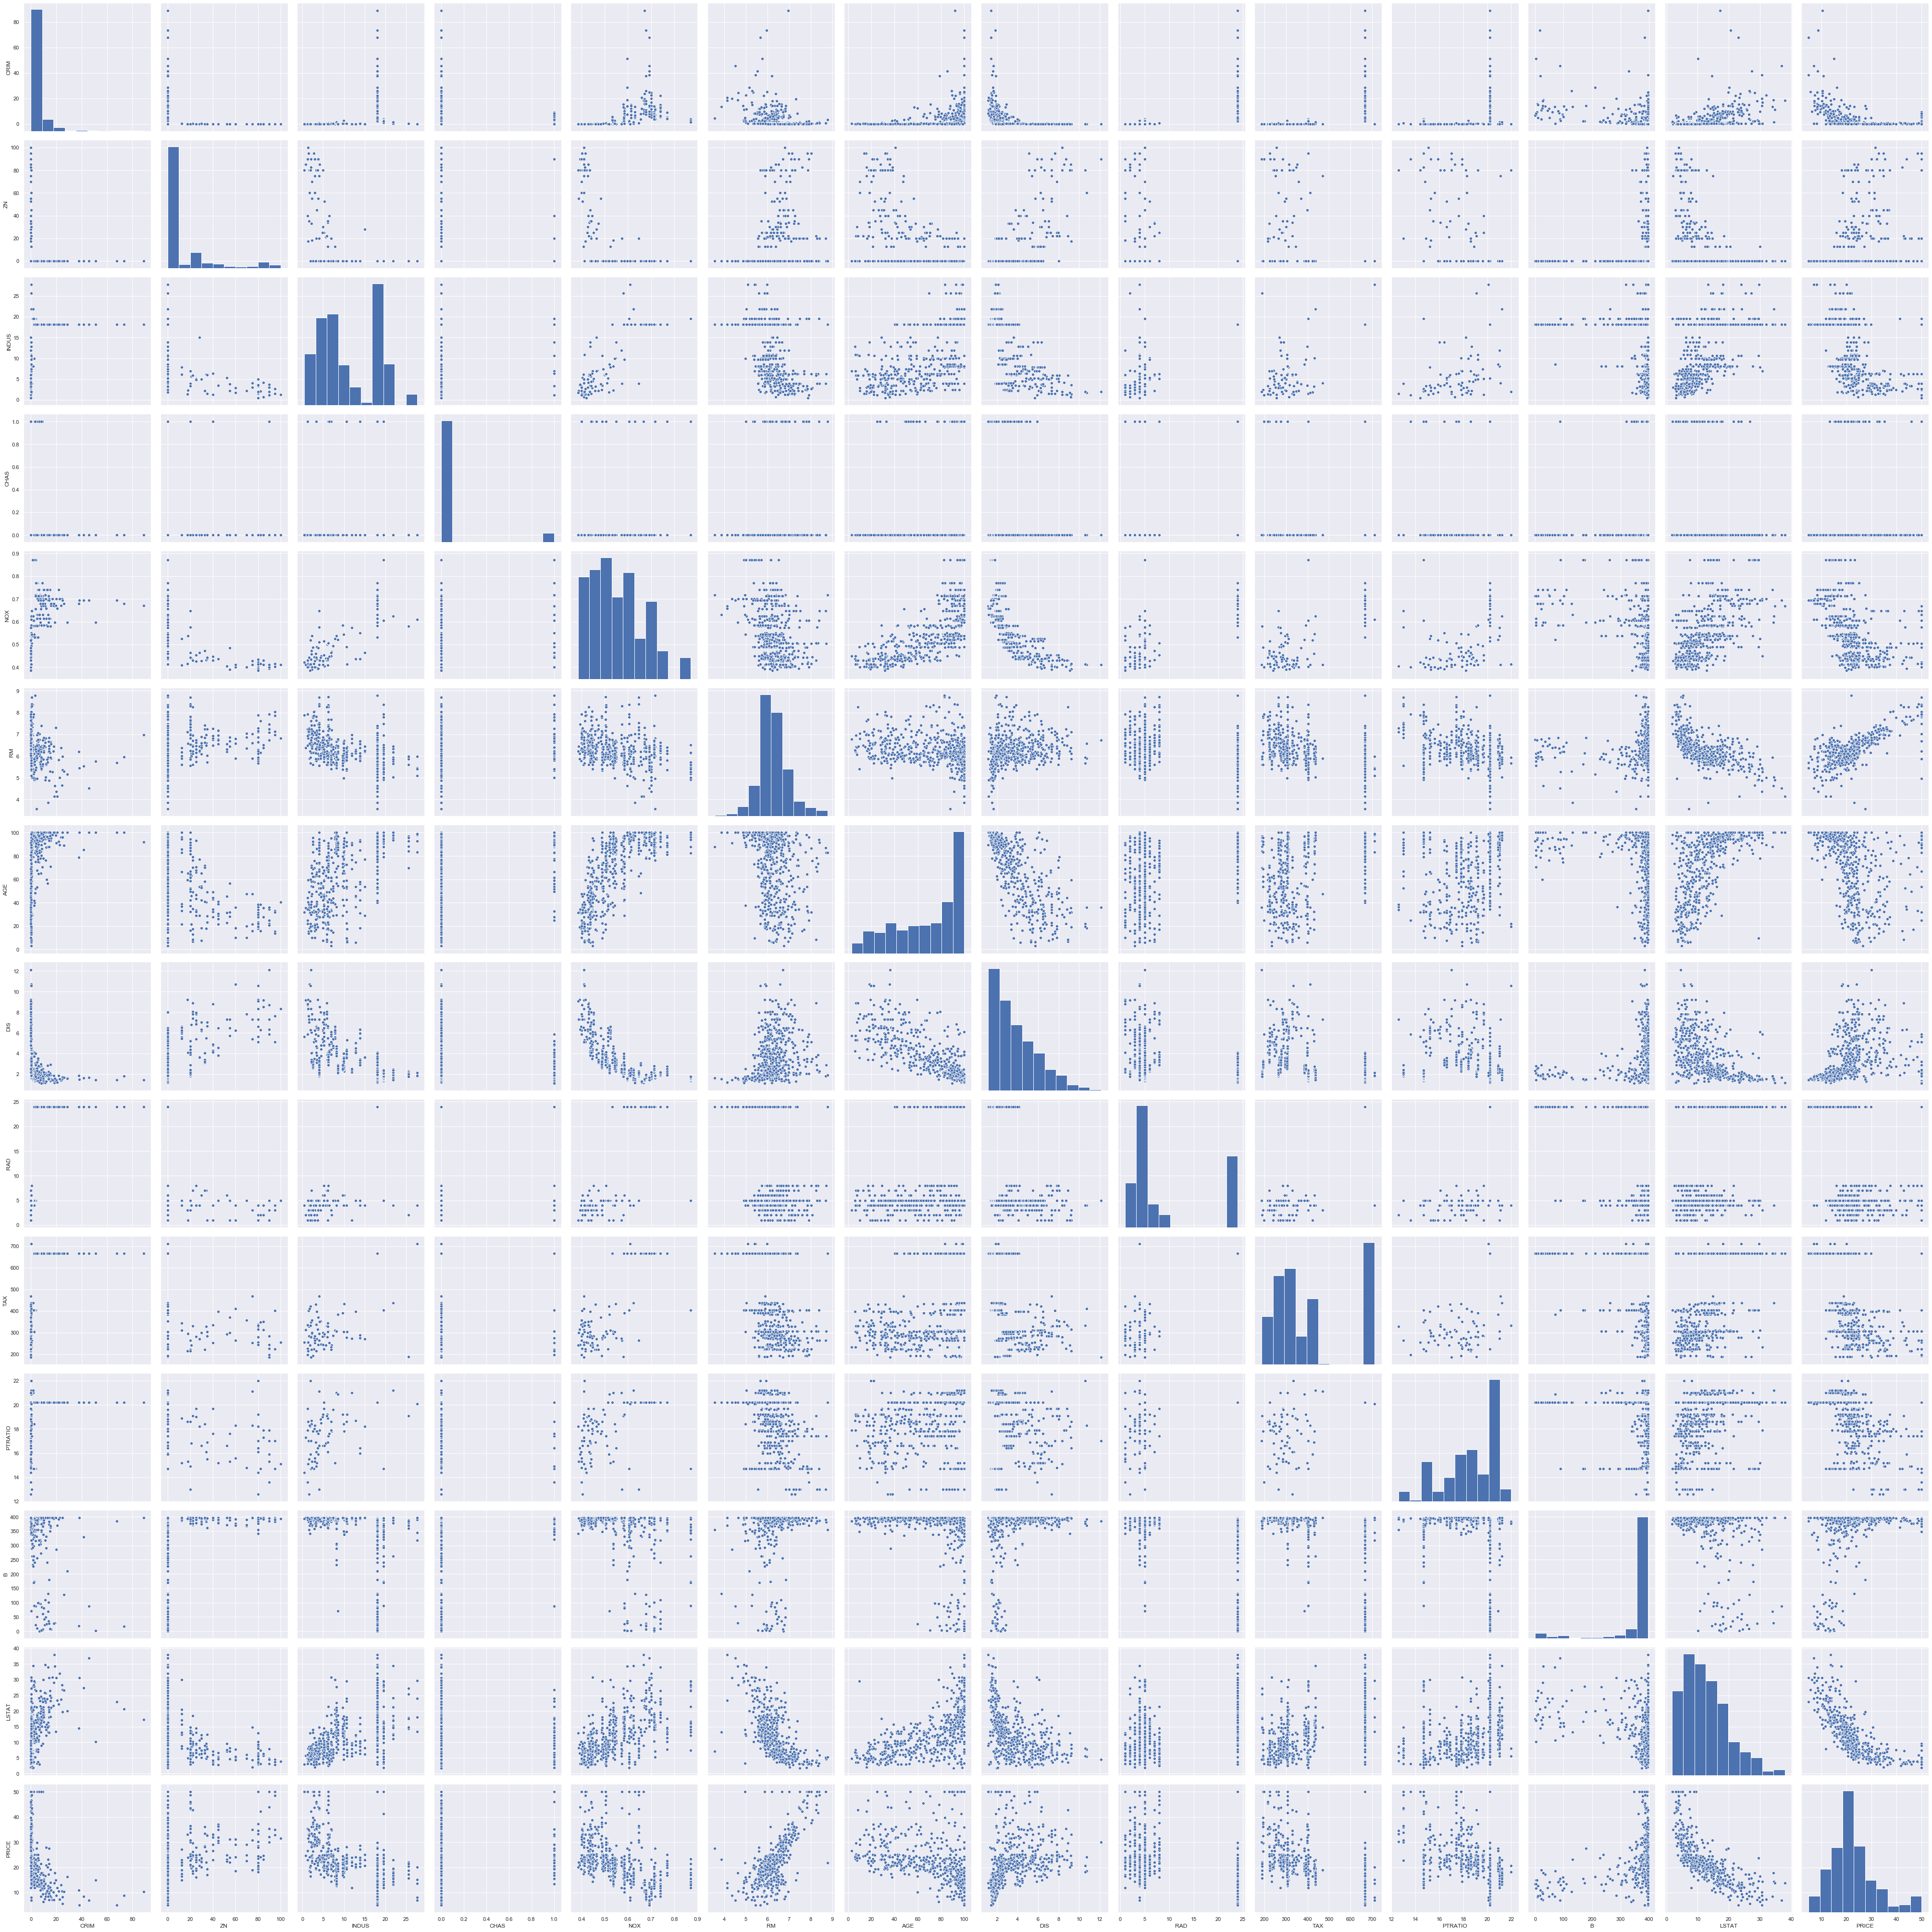

In [27]:
#Plot the various statistics against one another in pairs
sns.pairplot(bos, height=4)
plt.tight_layout()

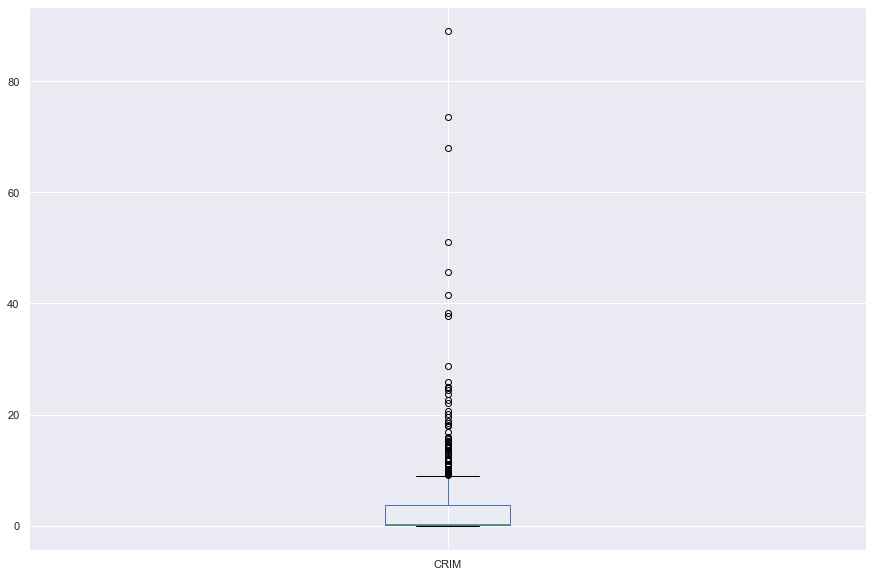

In [28]:
bos.boxplot(column='CRIM', sym='o', return_type='axes')

In [29]:
Age = bos.AGE

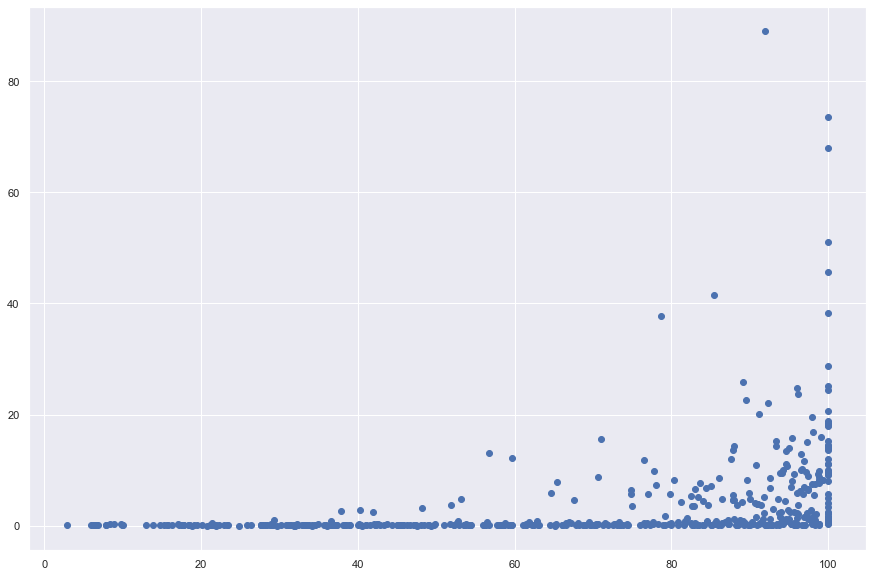

In [30]:
plt.scatter(Age, Crime_Rate)

<BarContainer object of 506 artists>

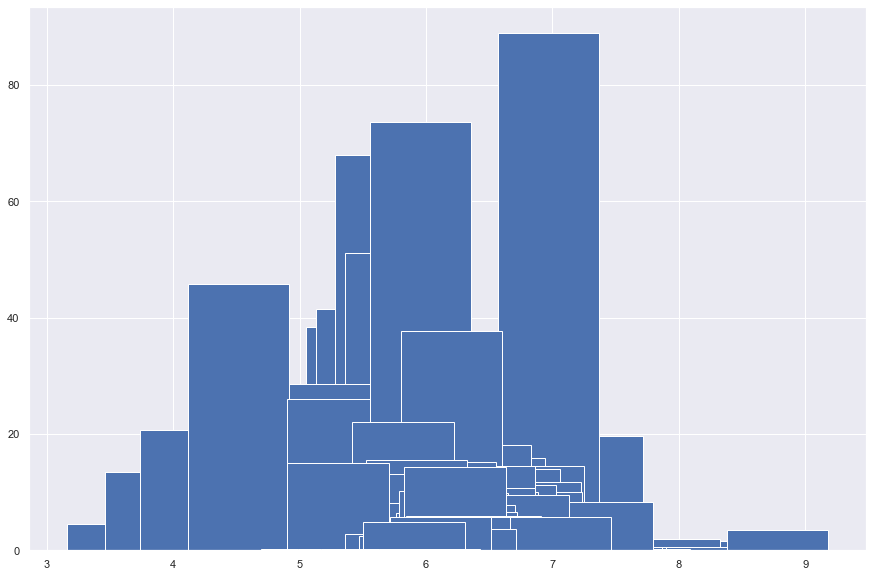

In [31]:
plt.bar(Number_of_Rooms, Crime_Rate)

In [32]:
UpperClass_Residential = bos.ZN

In [33]:
#Crime_Rate = bos.CRIM
#House_Price = bos.PRICE

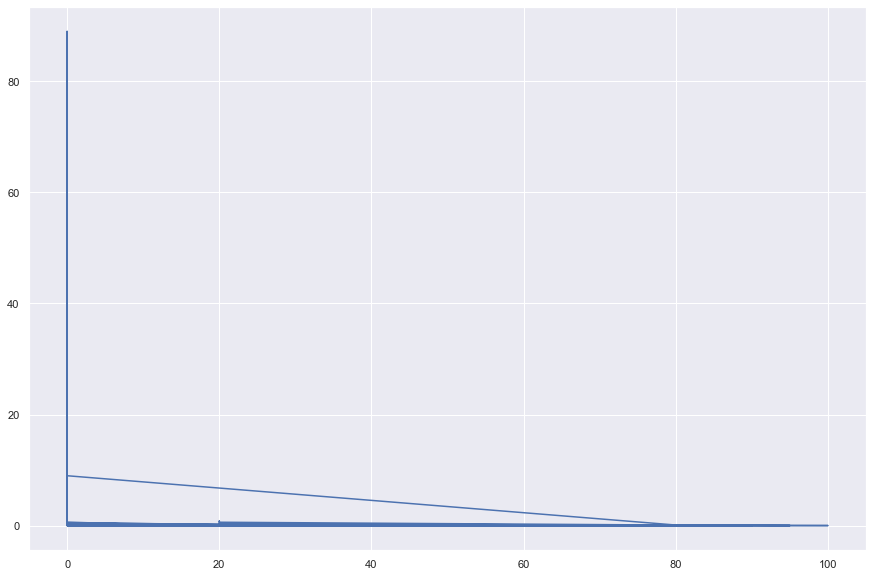

In [34]:
plt.plot(UpperClass_Residential, Crime_Rate)

In [35]:
Crime_Rate

0       0.00632
1       0.02731
2       0.02729
3       0.03237
4       0.06905
5       0.02985
6       0.08829
7       0.14455
8       0.21124
9       0.17004
10      0.22489
11      0.11747
12      0.09378
13      0.62976
14      0.63796
15      0.62739
16      1.05393
17      0.78420
18      0.80271
19      0.72580
20      1.25179
21      0.85204
22      1.23247
23      0.98843
24      0.75026
25      0.84054
26      0.67191
27      0.95577
28      0.77299
29      1.00245
         ...   
476     4.87141
477    15.02340
478    10.23300
479    14.33370
480     5.82401
481     5.70818
482     5.73116
483     2.81838
484     2.37857
485     3.67367
486     5.69175
487     4.83567
488     0.15086
489     0.18337
490     0.20746
491     0.10574
492     0.11132
493     0.17331
494     0.27957
495     0.17899
496     0.28960
497     0.26838
498     0.23912
499     0.17783
500     0.22438
501     0.06263
502     0.04527
503     0.06076
504     0.10959
505     0.04741
Name: CRIM, Length: 506,

# Assignment: Infer

In [36]:
# Load dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [37]:
Price = boston.target

In [38]:
Price

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [39]:
Charles_River = bos.CHAS

In [40]:
Charles_River.unique()

array([0., 1.])

In [41]:
bos.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

<BarContainer object of 506 artists>

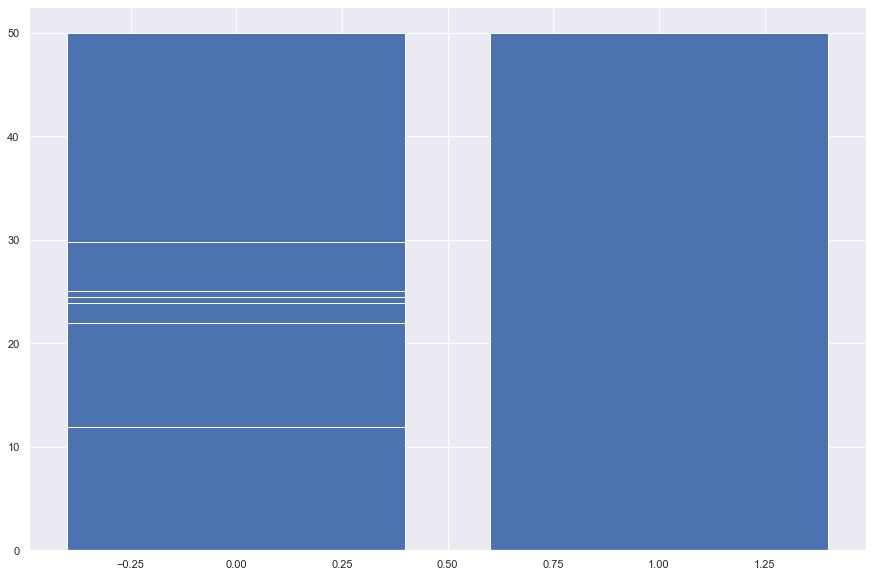

In [42]:
plt.bar(Charles_River, Price)

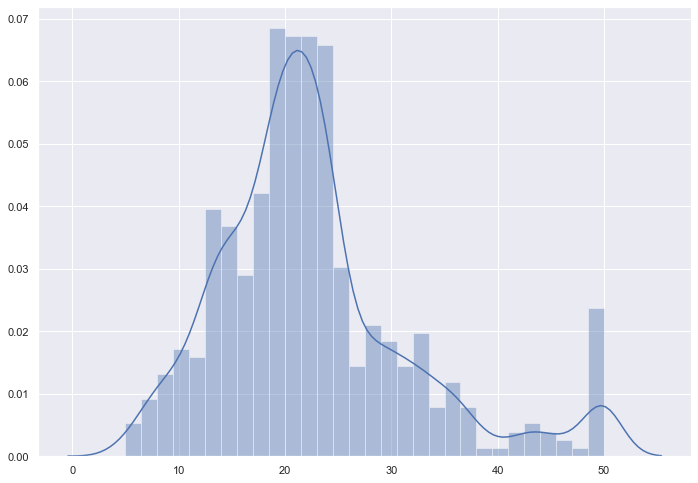

In [43]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['target'], bins=30)
plt.show()

In [44]:
bos.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

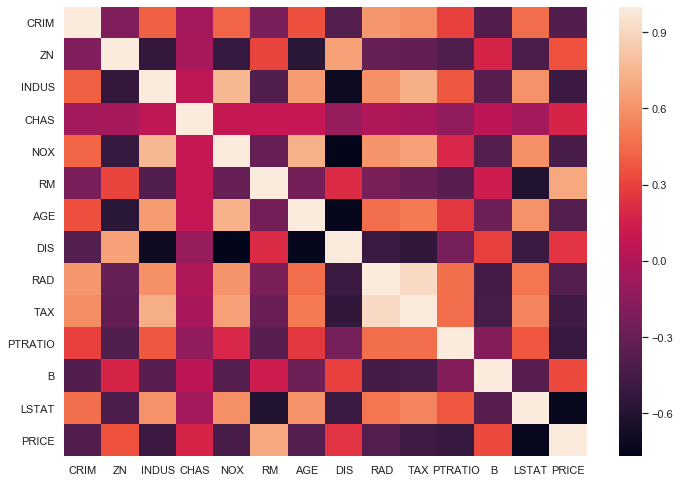

In [45]:
hm = sns.heatmap(bos.corr())

In [46]:
#We can see from the heatmat that there is a slight positive influence on property values which are bordering the Charles River.

# Assessment: Predict

# Option 1

In [47]:
# import libraries
import numpy as np
# for interacting with data sets.
import pandas as pd
import os
# sklearn is used to perform the train test split of the data
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
from sklearn import datasets
np.random.seed(1234)


from tensorflow.keras import models
from tensorflow.keras import layers


In [48]:
#Importing Dataser
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [49]:
print(f'Training data : {train_data.shape}')
print(f'Test data : {test_data.shape}')
print(f'Training sample : {train_data[0]}')
print(f'Training target sample : {train_targets[0]}')

Training data : (404, 13)
Test data : (102, 13)
Training sample : [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Training target sample : 15.2


In [50]:
#Feature Normalization
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std



In [51]:
#Building our model abd adding layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
    return model

In [52]:
#k-fold Validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f'Processing fold # {i}')
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
                            [train_data[:i * num_val_samples],
                            train_data[(i+1) * num_val_samples:]],
                            axis=0)
    partial_train_targets = np.concatenate(
                            [train_targets[:i * num_val_samples],
                            train_targets[(i+1)*num_val_samples:]],
                            axis=0)
    model = build_model()
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              batch_size=1,
              verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [53]:
#view scores
print(f'all_scores : {all_scores}')
print(f'mean all scores : {np.mean(all_scores)}')

all_scores : [1.8078866, 2.4158978, 2.8029556, 2.2311592]
mean all scores : 2.3144748210906982


In [54]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [55]:
test_mae_score

2.5133102

In [ ]:
# find the largest house price in the training set and use it to
# scale our house prices to the range [0, 1] 
maxPrice = train["price"].max()
trainY = train["price"] / maxPrice
testY = test["price"] / maxPrice

In [59]:
# process the house attributes data by performing min-max scaling
print("[INFO] processing data...")
(trainX, testX) = datasets.process_house_attributes(df, train, test)

[INFO] processing data...


AttributeError: module 'sklearn.datasets' has no attribute 'process_house_attributes'

# Option 2

In [56]:
#Importing necessary keras modules
from tensorflow import keras
from tensorflow.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [57]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [58]:
model = Sequential([
    Dense(16, inut_shape = (1,), activation='relu'),
    Dense(32), activation='relu'),
    
])

SyntaxError: invalid syntax (<ipython-input-58-1884bccfd9e1>, line 3)

In [ ]:
# load dataset
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

dataset = bos.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,12]

In [ ]:
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
model.summary()

In [ ]:
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

In [ ]:
# storing inforamtion in the varivble df so its easy to find
df

In [ ]:
#Add the column feature names 
df.columns = boston.feature_names

In [ ]:
dataset = df.values
# split into input (X) and output (Y) variables
x = df.iloc[:,0:13]
y = df.iloc[:,13]

In [ ]:
# convert into arrays
dataset = df.values

In [ ]:
# display what is in the dataset
dataset

In [ ]:
# split the dataset x is = to the input features and y is what we want it to predict for us,
# our first 10 columns in aray are x  and the last 10 columns in array are called y
X = dataset[:,0:10]

In [ ]:
# everything before the comma refers to the rows of the array everything after the comma refers to the columns 0-9
y = dataset[:,10]
# data is now split into input features x and label y is our prediction

In [ ]:
# this package will help us scale the data in order for us to be able to iniialize it
from sklearn import preprocessing

In [ ]:
# inputs lie between 0-1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
#our now scaled down dataset is now stored in x now we can see what this looks like
X_scale

In [ ]:
# using code trains-test split form skit learn
from sklearn.model_selection import train_test_split

In [ ]:
# test size will be 40 percent of the overall data, code will be stored in first four varibles on the left
# but because we want want a separate validation and test set we must split it again by using the line of code below.
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.4)

In [ ]:
# test size will be 50 percent of overall data, splitting it equally
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

In [ ]:
# We now need to import the codes we need from keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# now we must specify that in our sequential model 
# we will store our model in the variable "model" and thus describe it layer by layer or in other words sequentially, 
# first layer is a dense layer ( here we are using a fully connected layer) with 32 neurons
# ReLU activation and input shape is 10 = 10 input features
#  2nd layer also has 32 neurons, and also using dense layer but does not need to be described as keras willl use output from
# first layer
# 3rd layer is a dense layer with 1 neuron, sigmoid activation. This is knows as our architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
# with these settings we can call the function "model.compile". stochastic gradient descent = sgd.
# loss function for outputs = values = 1 or 0, we also want to track accuracy, now run it then train it.
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# function = fit, to fit parameters to the data = x_train, y_train. 
# then we must specify size of batch and and how long we want to trainit for.
# also specify our validation data so the model knows how we are doing as we go.
# hist will output a history
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

In [ ]:
# above we can see the model is training and that 
# to show the accuracy of our test set run below code
model.evaluate(X_test, Y_test)[1]

In [ ]:
import keras as kr
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

plt.rcParams['figure.figsize'] = (10, 10)

In [ ]:
# create a new neural network
n = kr.models.Sequential()

# add a single neuron in a single layer, initialised with weight 1 and bias 0.
n.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

# compile the model
n.compile(loss="mean_squared_error", optimizer="sgd")

In [ ]:
# create some input values
x = np.arrange(0.0, 10.0, 1)

# run each x value through the neural network
y = n.predict(x)

In [ ]:
x

In [ ]:
y

In [ ]:
# plot the values
plt.plot(x, y, 'k,')

In [ ]:
plt.show()

In [ ]:
# Create a new neural network.
m = kr.models.Sequential()

# Add a two neurons in a single layer.
m.add(kr.layers.Dense(2, input_dim=1, activation="linear"))

# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
m.add(kr.layers.Dense(1, activation="linear", kernel_initializer=kr.initializers.Constant(value=1), bias_initializer=kr.initializers.Constant(value=0)))

# Set the weight/bias of the two neurons.
m.layers[0].set_weights([np.matrix([2, 3]), np.array([-5, -3])])

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="sgd")

In [ ]:
#create some input values.
x = np.arange(0.0, 10.0, 1)

# Run each x value through the neural network.
y = m.predict(x)

In [ ]:
# Plot the values.
plt.plot(x, y, 'k.')
plt.show()

# Option 3

In [34]:
import keras as kr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)

In [35]:
#Pick our model, we will use a sequential model
model = kr.models.Sequential()

In [36]:
#Import necessary modules
from keras.layers import Dense

In [37]:
#Add layers to our model
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))

In [38]:
#Compile our model
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [39]:
# load dataset
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

dataset = bos.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,12]

In [40]:
bos.head()

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [3]:
#Training our model
model.fit(x_train, y_train, epochs=5, batch_size=32)


NameError: name 'model' is not defined

In [ ]:
#Evaluate performance of model
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

In [ ]:
#Use our ,odel to make predictions
classes = model.predict(x_test, batch_size=128)